# Data Analysis and Data Science
## Be curious about the method 

By: Caroline Labelle
<br>For: BIM6065-C

<br>
Date: July 4th, 2023

<hr style="border:1px solid black"> </hr>

In [2]:
### Student Name: Mateusz Checinski

Complete the following exercises and submit your Notebook in a HTML format on StudiUM. You have until July 5th, noon to hand-in your Notebook.

In [3]:
### Import sklearn
import sklearn.decomposition, sklearn.cluster

### Import scipy
import scipy as sp

### Import pandas, numpy, seaborn and matplotlib.pyplot
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
sns.set(rc={'figure.figsize':(4, 2)})
sns.set_theme(context="notebook", style="white", palette="Set2")

## Genes correlation [25 pts]

In [7]:
### Import and clean the Gene expression cancer 1 dataset
fn = "gene_expression_cancer_1.csv"
data = pd.read_csv(fn)
data.head()

,ESR1,PGR,BCL2,NAT1,Results
0,5.1,3.5,1.4,0.2,Cured
1,4.9,3.0,1.4,0.2,Cured
2,4.7,3.2,1.3,0.2,Cured
3,4.6,3.1,1.5,0.2,Cured
4,5.0,3.6,1.4,0.2,Cured


### Global correlation [6 pts]

Pearson correlation coefficient: -0.10936924995064938
 
Interpretation: The plot Pearson correlation coefficient (PCC) which is much closer to 0 rather than 1 or -1 (-0.1094). This suggests there is not much significance between PGR and ESR1 expression  
 
However, it is important to note that even a PCC of 0 does not explicitly imply no correlation. The correlation might not be linear but may be exponential as an example.


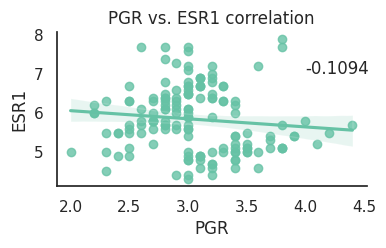

In [50]:
### Consider the PGR and ESR1 genes. Do the expression of these two genes correlates?
### Consider the entire dataset.
### Answer the question with a Pearson correlation coefficient, a plot and brief interpretation of your results.

reg = sp.stats.linregress(x=data.PGR , y=data.ESR1, alternative="two-sided")
print("Pearson correlation coefficient:" ,reg.rvalue)

p = sns.regplot(data, x="PGR", y="ESR1")
p.text(4,7, np.round(reg.rvalue, 4))
p.set_title("PGR vs. ESR1 correlation")

sns.despine()

print(" ")
print("Interpretation: The plot Pearson correlation coefficient (PCC) which is much closer to 0 rather than 1 or -1 (-0.1094). This suggests there is not much significance between PGR and ESR1 expression  ")
print(" ")
print("However, it is important to note that even a PCC of 0 does not explicitly imply no correlation. The correlation might not be linear but may be exponential as an example.")

### Grouped correlations [14 pts]

[[3.418      5.006     ]
 [3.07446809 6.81276596]
 [2.69245283 5.77358491]]


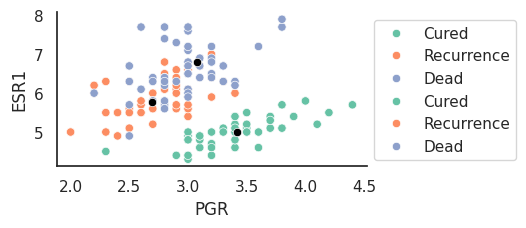

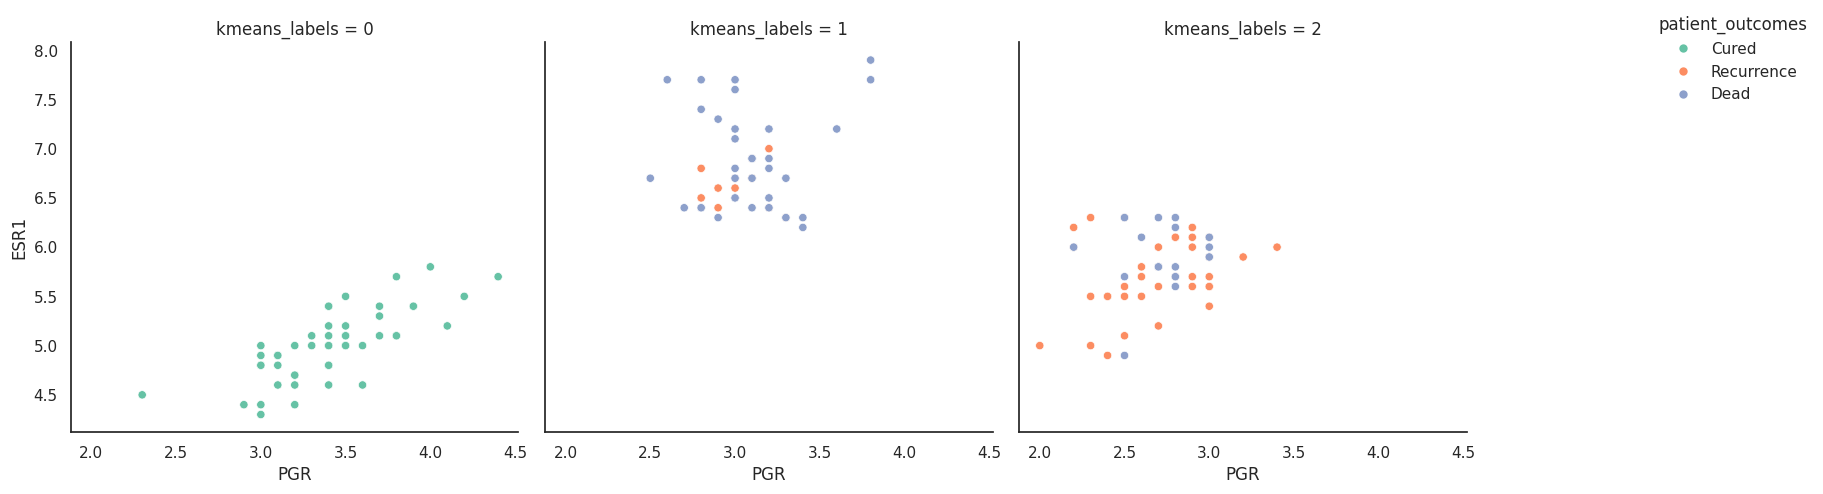

In [53]:
### Consider the same two genes, but assess correlation based on the patient outcomes (a.k.a "Results").
### For each group, return a Pearson correlation coefficient and a plot.
### (You can generate a single plot with all three groups or three individual plots)
### Briefly interpret your results and state if your conclusion differ from the one previously made (Global correlation).


p = sns.scatterplot(data, x="PGR", y="ESR1", hue="Results")
sns.move_legend(p, "upper left", bbox_to_anchor=(1,1))
sns.despine()

subset_KM = data.loc[:, ["PGR", "ESR1"]]
subset_KM.head()

kmean_algo = sklearn.cluster.KMeans(n_clusters=3, n_init="auto")
kmeans_subset = kmean_algo.fit(subset_KM)

print(kmeans_subset.cluster_centers_)
cent_by_axes = kmeans_subset.cluster_centers_.T
cent_by_axes

p = sns.scatterplot(data, x="PGR", y="ESR1", hue="Results")

### Visualize the centroide on the plot
sns.scatterplot(x=cent_by_axes[0], y=cent_by_axes[1], color="black")

sns.move_legend(p, "upper left", bbox_to_anchor=(1,1))
sns.despine()

kmeans_subset.labels_

subset_KM.loc[:, "patient_outcomes"] = data.Results
subset_KM.loc[:, "kmeans_labels"] = kmeans_subset.labels_

subset_KM.head()

p = sns.relplot(subset_KM, x="PGR", y="ESR1", hue="patient_outcomes", col="kmeans_labels")
sns.move_legend(p, "upper left", bbox_to_anchor=(1,1))
sns.despine()

### Spearman's rank correlation [5 pts]

In [55]:
### Calculate the Spearman' rank correlations for the four comparisons made previously.
### (Global dataset and the three goups)
### Do the results differ? if so, do the conlusions also differ? 
### Briefly explain what are the new conclusions.

speaR = sp.stats.spearmanr(data.PGR, data.ESR1)
speaR

SignificanceResult(statistic=np.float64(-0.15945651848582867), pvalue=np.float64(0.05128491483834292))

In [56]:
speaR = sp.stats.spearmanr(subset_KM.PGR, subset_KM.ESR1)
speaR

SignificanceResult(statistic=np.float64(-0.15945651848582867), pvalue=np.float64(0.05128491483834292))